# Harshal Dupare | 18MA20015

Weather Classification from Images

The objective of this assignmentis to predict the weather conditions from a set of images. The weatherconditions are cloudy, rain, shine and sunrise. Thus, you have to classify each of the images into one of thesefour categories.

You need to use SIFT image features and KNN algorithm to classify the images. For KNN set k to 20. Note that number of SIFT feature vectors are not same for all the images. Thus, while applying KNN, you have to handle this differently to compute the similarity between images.

For this purpose, you use the following similarity measure between two images. Assume thatyou have two images I1 and I2 with number of SIFT feature vectors m and n. The distancebetween  I1  and  I2  is  defined  as the average  Euclidean distance  of  the firstand  the second  closest points of the two images. 

Training and submission guidelines: You  must  use  80%  images  from  each of  the class  for training and  the  rests  for  testing  your implementation.Submit  your  code  and  the  final  accuracy  on  the  test  set  in  two  separate  files  in moodle. 

In [ ]:
# ran on colab
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [122]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import cv2 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
ML_LAB = os.path.join(os.getcwd(),'drive','MyDrive','ML')
DATA_FOLDER = os.path.join(ML_LAB,"dataset2")
LABELS = ['cloudy','rain','shine','sunrise']
EXT = ['.jpg','jpeg','.png']
SIZE = [300,215,253,357]

In [51]:
# distance function

# O(n^2) distance algorithm
def sift_dist(x,y):
    try:
        dist=[]
        for i in range(x.shape[0]):
            for j in range(y.shape[0]):
                d=np.linalg.norm(x[i]-y[j])
                dist.append((d,i,j))                
        dist=sorted(dist)
        s={dist[0][1],dist[0][2]}
        d=dist[0][0]
        for j in range(1,len(dist)):
            S = s.copy()
            D = (d+dist[j][0])/2
            S.add(dist[j][1])
            S.add(dist[j][2])
            if len(S)==4:
                break

        return D
    except:
        return float('inf')

# O(nlog(n)) distance algorithm
def sift_dist1(x,y):
    try:
        tree = KDTree(x, leaf_size=2)
        dist = []
        for i in range(y.shape[0]):
            disti, indi = tree.query(y[i:i+1], k=1)
            dist.append((disti,indi[0][0],i))

        dist=sorted(dist)
        s={dist[0][1],dist[0][2]}
        d=dist[0][0]
    for j in range(1,len(dist)):
        S = s.copy()
        D = (d+dist[j][0])/2
        S.add(dist[j][1])
        S.add(dist[j][2])
        if len(S)==4:
            break

        return D[0][0]
    except:
          return float('inf')

    

In [10]:
# Computing the key points and storing them
MAX_POINTS=50 # using only top 50 points
points=dict()
error_list=[]
sift = cv2.xfeatures2d.SIFT_create(MAX_POINTS)
for l,i in zip(LABELS,range(len(LABELS))):
    points[l]=[]
    for j in tqdm(list(range(1,SIZE[i]+1))):
        try:
            for ext in EXT:
                if os.path.exists(os.path.join(DATA_FOLDER,l+str(j)+ext)):
                    img = cv2.imread(os.path.join(DATA_FOLDER,l+str(j)+ext))  
                    break
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            keys, pts = sift.detectAndCompute(img,None)
            if type(pts) == type(None):
                continue
            points[l].append(pts)
        except:
            error_list.append(os.path.join(DATA_FOLDER,l+str(j)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [133]:
# Time Complexity calculation

T = 0 # for n^2 distance algorithm
T2 = 0 # for nlog(n) distance algorithm
n_i=0
n_i2=0
for l in LABELS:
    for p in points[l]:
        if type(p)!=type(np.array([1,2])):
            continue
        n_i+=p.shape[0]
        n_i2+=p.shape[0]**2
        T+=p.shape[0]*np.log(p.shape[0])
        T2+=p.shape[0]*(np.log(p.shape[0])+1)
T += (n_i**2-n_i2)*p.shape[1]
T2 *= p.shape[1]
print(T*1e-7/(60),'mins')
print(T2*1e-7/(60),'mins')
print("they are just estimates and give rough idea the real time takes depends alot on the constants - which is machine dependent")

604.5676049295461 mins
0.055492421907232796 mins
they are just estimates and give rough idea the real time takes depends alot on the constants - which is machine dependent


In [69]:
for l in LABELS:
    for p in points[l]:
        if type(p)!=type(np.array([1,2])):
            print(l)
            print(type(p))
            
# setting up train and test data
dX=dict()
dy=dict()
for i in range(len(LABELS)):
    l=LABELS[i]
    dX[l]=[]
    dy[l]=[]
    for j in range(len(points[l])):
        dX[l].append([i,j])
        dy[l].append(i)

In [70]:
# Train Test Split
split=0.8
X_train=[]
y_train=[]
X_test=[]
y_test=[]
for i in range(len(LABELS)):
    l = LABELS[i]
    n = int(split*len(points[l]))
    X_train+=(dX[l][0:n])
    y_train+=(dy[l][0:n])
    X_test+=(dX[l][n:])
    y_test+=(dy[l][n:])

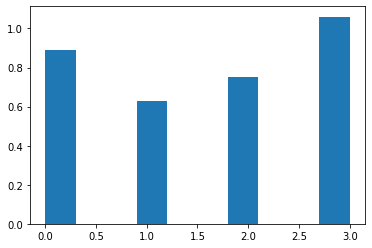

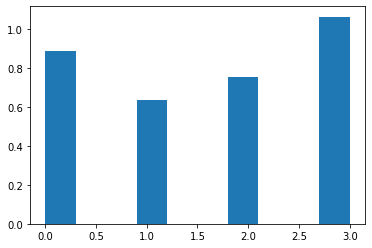

array([0.26548673, 0.        , 0.        , 0.19026549, 0.        ,
       0.        , 0.22566372, 0.        , 0.        , 0.31858407])

In [118]:
plt.hist(y_train,density=True)
plt.show()

distr=plt.hist(y_test,density=True)
plt.show()

distr=np.array(distr[0])/np.linalg.norm(np.array(distr[0]),ord=1)
distr

In [53]:
# creating distance dictionary

# takes lot of time, dont run again might take 1-2 hurs on Colab - CPU when using nlog(n), sift_dist1
# takes lot of time, dont run again might take 4-6 hurs on Colab - CPU when using n^2, sift_dist

DIST=dict()
        
for i in range(len(LABELS)):
    l=LABELS[i]
    for j in tqdm(range(len(points[l]))):
        for k in range(i,len(LABELS)):
            lk = LABELS[k]
            if k > i:
                for t in range(len(points[lk])):
                    d = sift_dist1(points[lk][t],points[l][j])
                    DIST[lk+str(t)+l+str(j)]=d
                    DIST[l+str(j)+lk+str(t)]=d
            else:
                for t in range(j,len(points[lk])):
                    d = sift_dist1(points[lk][t],points[l][j])
                    DIST[lk+str(t)+l+str(j)]=d
                    DIST[l+str(j)+lk+str(t)]=d
                

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [108]:
# main metric function to pass
def myMetric(x,y):
    try:
        return DIST[LABELS[int(x[0])]+str(int(x[1]))+LABELS[int(y[0])]+str(int(y[1]))]
    except:
        return float('inf')

In [109]:
X_train=np.array(X_train).reshape(-1,2)
X_test=np.array(X_test).reshape(-1,2)
X_train.shape

(893, 2)

In [126]:
knn = KNeighborsClassifier(20,metric=myMetric)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30,
                     metric=<function myMetric at 0x7f187f0df400>,
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [127]:
y_pred = knn.predict(X_train)
print(f"The performance of the model on test data with {20} neighbours is")
print(classification_report(y_train,y_pred))
for i in range(len(LABELS)):
    print(i,":",LABELS[i])

The performance of the model on test data with 20 neighbours is
              precision    recall  f1-score   support

           0       0.59      0.43      0.50       239
           1       0.55      0.53      0.54       169
           2       0.74      0.27      0.40       201
           3       0.46      0.79      0.58       284

    accuracy                           0.53       893
   macro avg       0.59      0.50      0.50       893
weighted avg       0.58      0.53      0.51       893

0 : cloudy
1 : rain
2 : shine
3 : sunrise


In [128]:
y_pred = knn.predict(X_test)
print(f"The performance of the model on test data with {20} neighbours is")
print(classification_report(y_test,y_pred))
for i in range(len(LABELS)):
    print(i,":",LABELS[i])

The performance of the model on test data with 20 neighbours is
              precision    recall  f1-score   support

           0       0.51      0.35      0.42        60
           1       0.64      0.67      0.66        43
           2       0.47      0.18      0.26        51
           3       0.45      0.75      0.56        72

    accuracy                           0.50       226
   macro avg       0.52      0.49      0.47       226
weighted avg       0.51      0.50      0.47       226

0 : cloudy
1 : rain
2 : shine
3 : sunrise


In [129]:
acc = []
nbr = []
for n in range(2,100):
    knn = KNeighborsClassifier(n,metric=myMetric)
    knn.fit(X_train, y_train)
    perc = (knn.score(X_test, y_test)*100).__round__(2)
    acc.append(perc)
    nbr.append(n)
    print(f"The accuracy of the model with {n} neighbours is "+str(perc)+"%")

The accuracy of the model with 2 neighbours is 41.59%
The accuracy of the model with 3 neighbours is 46.02%
The accuracy of the model with 4 neighbours is 46.02%
The accuracy of the model with 5 neighbours is 47.79%
The accuracy of the model with 6 neighbours is 46.02%
The accuracy of the model with 7 neighbours is 46.02%
The accuracy of the model with 8 neighbours is 46.46%
The accuracy of the model with 9 neighbours is 51.77%
The accuracy of the model with 10 neighbours is 50.88%
The accuracy of the model with 11 neighbours is 51.77%
The accuracy of the model with 12 neighbours is 50.0%
The accuracy of the model with 13 neighbours is 47.79%
The accuracy of the model with 14 neighbours is 50.88%
The accuracy of the model with 15 neighbours is 48.23%
The accuracy of the model with 16 neighbours is 51.33%
The accuracy of the model with 17 neighbours is 51.77%
The accuracy of the model with 18 neighbours is 51.77%
The accuracy of the model with 19 neighbours is 51.33%
The accuracy of the

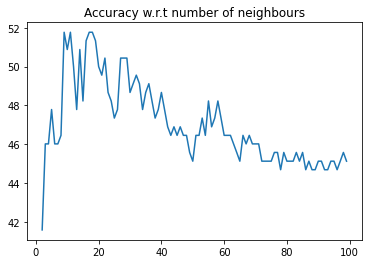

In [130]:
plt.plot(nbr,acc)
plt.title("Accuracy w.r.t number of neighbours")
plt.show()

## To see how will it performs wrt a random assignment we will calculate the expected accuracy of random assignment

if distribution of classes is given by $p_i$ for $i=0,1,...n$ then the probability of getting it right is to get $p_i$ and also predict $p_i$ hence the expected accuracy of random assignement is 

$$
Random\ assignment\ accuracy = \Sigma_{i=0}^{n} p_i^2 = 25.91 \%
$$

In [125]:
Random_accuracy=np.sum(distr**2)
print((Random_accuracy*100).__round__(2),"%")

25.91 %
